In [1]:
# imports
import os
import sys
sys.path.append("../")
from functions_EDX import *
import numpy as np
import time
import matplotlib.pyplot as plt
import tifffile as tf

## Get NPS for a given tile

In [2]:
spectrum_folder = '../../../primary_data/main_mosaic_6by5/Spectrum2D_PC10'
file_names = []
tmp = os.listdir(spectrum_folder)
for filename in tmp:
    if filename.endswith('.npz'):
        file_names.append(filename)

file_names = sorted(file_names)
files = [os.path.join(spectrum_folder,file_name) for file_name in file_names]



### choose tile

In [3]:
tile_idx = 0
spectrum_2D = np.load(files[tile_idx])['spectrum_2D']

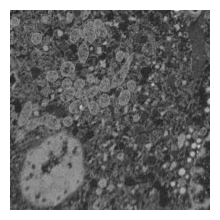

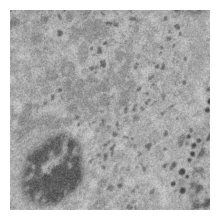

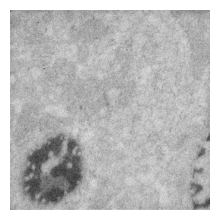

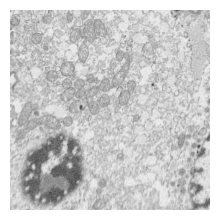

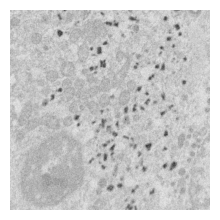

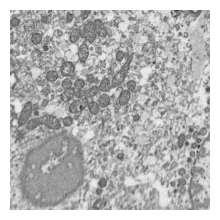

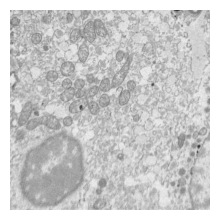

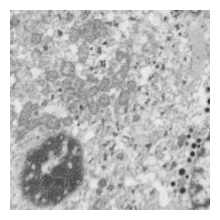

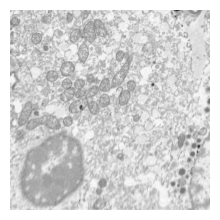

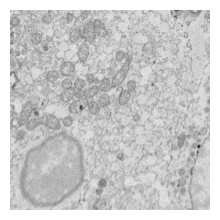

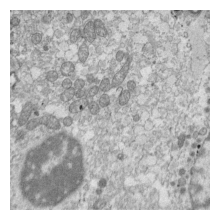

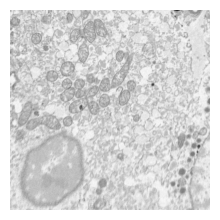

In [4]:
elements = ['C', 'N', 'O', 'P', 'S', 'Cl', 'Ca', 'Cu', 'Al', 'Fe', 'Fe', 'Os']
energies = [3, 4, 6, 25, 28, 32, 46, 11, 18, 80, 8, 23]
for idx,element in enumerate(energies):
    f,ax = plt.subplots(figsize=(2,2))
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    img = spectrum_2D.reshape(1024,1024,250)[:,:,element]
    ax.imshow(img,cmap='gray_r')
    plt.axis('off')
    plt.savefig('../../secondary_data/Figure_1_%s.png' % elements[idx],dpi=300) #,bbox_inches='tight')
    #plt.show()
    #tf.imwrite('../../secondary_data/Figure_1_%s.tiff' % elements[idx],img)  
    

### Load the abundance maps for the selected tile

In [57]:
abundance_maps = np.load('../../../primary_data/abundance_maps.npz')['arr_0'][:,:,:,tile_idx]

### Show all

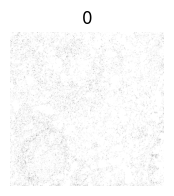

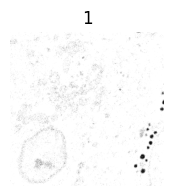

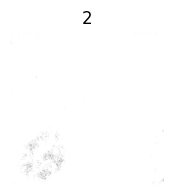

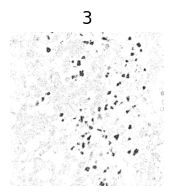

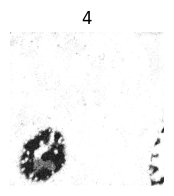

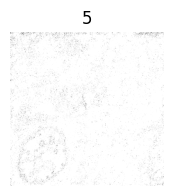

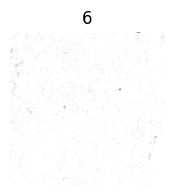

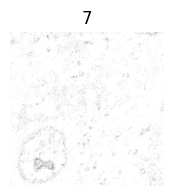

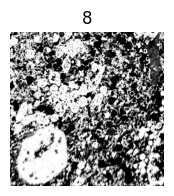

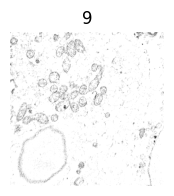

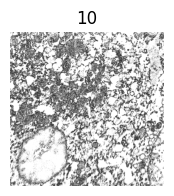

In [59]:
for idx in range(abundance_maps.shape[0]):
    f,ax = plt.subplots(figsize=(2,2))
    img = abundance_maps[idx,:,:]
    ax.imshow(img,cmap='gray_r')
    ax.set_title(idx)
    plt.axis('off')
    plt.show()

### Save a subset for the figure

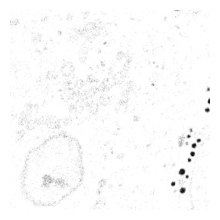

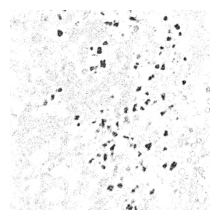

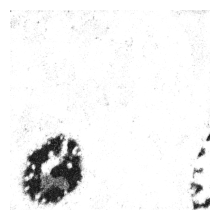

In [64]:
selected = [1,3,4]
for idx in selected:
    f,ax = plt.subplots(figsize=(2,2))
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    img = abundance_maps[idx,:,:]
    ax.imshow(img,cmap='gray_r')
    plt.margins(0,0)
    plt.axis('off')
    
    plt.savefig('../../secondary_data/Figure_1_abundanceMap%02d.png' % idx,dpi=300) #,bbox_inches='tight')
    